In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import random

Populating the interactive namespace from numpy and matplotlib


## Data Overview

I acquired the data from [IBM](https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data)

In [2]:
tele = pd.read_csv('Telco-Customer-Churn.csv')
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("\n# of Rows: ", tele.shape[0])
print("\n# of Columns: ", tele.shape[1])
print('\nName of Columns: ', tele.columns.tolist())
print("\nTotal Missing values : ", tele.isnull().sum().values.sum())
print("\nUnique Elements: ")
print(tele.nunique())
print('\n')
print(tele.dtypes)


# of Rows:  7043

# of Columns:  21

Name of Columns:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Total Missing values :  0

Unique Elements: 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


customerID           object
gender

    customerID - Customer ID
    gender - Whether the customer is a male or a female
    SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
    Partner - Whether the customer has a partner or not (Yes, No)
    Dependents - Whether the customer has dependents or not (Yes, No)
    tenure - Number of months the customer has stayed with the company
    PhoneService - Whether the customer has a phone service or not (Yes, No)
    MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
    InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
    OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
    OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
    DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
    TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
    StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
    StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
    Contract - The contract term of the customer (Month-to-month, One year, Two year)
    PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    MonthlyCharges - The amount charged to the customer monthly
    TotalCharges - The total amount charged to the customer
    Churn - Whether the customer churned or not (Yes or No)

There are 3 numerical type columns: 'Senior Citizen','tenure','MonthlyCharges' and 18 object type columns
However, TotalCharges has to be numerical, instead of an object and Tenure can be represented as categorical type.
I will manipulate TotalCharges to numerical type and sub-categorize tenure into years.
Then, I will convert Yes or No values to binary integer

## ETL

In [4]:
def categorize_tenure(tenure):
    """ 
        Categorizing corresponding tenure to each year
    """
    if tenure <= 12.0:
        return '0-1 year'
    elif 12 < tenure <= 24:
        return '1-2 years'
    elif 24 < tenure <= 36:
        return '2-3 years'
    elif 36 < tenure <= 48:
        return '3-4 years'
    elif 48 < tenure <=60:
        return '4-5 years'
    else:
        return '> 5 years'
    

In [5]:
tele.set_index('customerID', inplace=True)
tele['TotalCharges'] = pd.to_numeric(tele['TotalCharges'].replace(' ',np.nan))
print('# of Missing Total Charges', tele['TotalCharges'].isnull().sum())
tele[tele['TotalCharges'].isnull()].head()

# of Missing Total Charges 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


There is no tenure information and all users with missing total charges retain on the system.
I will drop customers with missing total charges since it does not give you any specific information about user being churn.


In [6]:
tele.dropna(inplace=True)
tele['cat_tenure'] = tele['tenure'].apply(lambda x: categorize_tenure(x))
tele['cat_tenure'] = pd.Categorical(tele['cat_tenure'], categories = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '> 5 years'] , ordered = True)
no_service_cols = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# If there is no Internet Service, then all other online and support features are not provided.
# No need to keep "No internet service". It will add more parameters to a model.
tele[tele['OnlineSecurity'] == 'No internet service'][no_service_cols].head()

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7469-LKBCI,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8191-XWSZG,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1680-VDCWW,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1066-JKSGK,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7310-EGVHZ,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [7]:
def replace_to_no(col):
    if col == 'MultipleLines':
        tele[col] = tele[col].replace('No phone service','No')
    else:
        tele[col] = tele[col].replace('No internet service','No')
    return(tele[col])

for col in no_service_cols:
    tele[col] = replace_to_no(col)    
tele['SeniorCitizen'] = tele['SeniorCitizen'].map({0:'No',1:'Yes'})
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cat_tenure
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year


In [8]:
churn = tele[tele['Churn'] == 'Yes']
retain = tele[tele['Churn'] == 'No']

## EDA

In [9]:
def perc_distribution(data,column):
    """ 
        data: pd.DataFrame
        column: string
        Given data, returns the distribution of unique element in its column
    """
    distributions = [i/ len(data) for i in data[column].value_counts(sort=False).values]
    elements = data[column].value_counts(sort=False).keys()
    return(distributions,elements)

In [10]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [11]:
def plot_two_pie_charts(data, data2,column):
    """
        Plotting two comparable pie charts.
        Input: data - pd.DataFrame() object sharing same columns with data2
               data2 - pd.DataFrame() '''
               column - string. variable we want to compare in data & data2 
                        data[column] has to be categorical
        
        Output: Two pie charts
        
    """
    

    fig, ax = plt.subplots(ncols=2, figsize=(7,7))
    fig.tight_layout(w_pad=2)
    sizes, col_ele = perc_distribution(data,column)
    sizes2, col_ele2 = perc_distribution(data2,column)
    
    col_name = str(column)
    data_name = get_df_name(data).capitalize()
    data2_name = get_df_name(data2).capitalize()
    
    ax[0].pie(sizes,autopct='%1.1f%%',
          shadow=True, startangle=90, textprops=dict(color="w"))
    ax[0].set_title(col_name + ' in ' + data_name + ' Data', fontsize=10)

    
    ax[1].pie(sizes2,autopct='%1.1f%%',
          shadow=True, startangle=90, textprops=dict(color="w"))

    color_map = {'No':'blue','Yes':'orange'}
    ax[1].set_title(col_name + ' in ' + data2_name + ' Data',fontsize=10)
    ax[1].legend(labels=col_ele, loc='upper right',bbox_to_anchor=(1.67,1),borderaxespad=0.)
    plt.show()
    

### Pie Chart of User Distribution

Text(0.5, 1.0, 'Churn Rate of Users in Data')

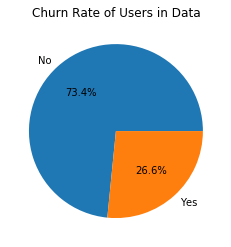

In [12]:
churned_ratio, lab = perc_distribution(tele,'Churn')
plt.pie(churned_ratio, labels=lab, autopct='%1.1f%%')
plt.title('Churn Rate of Users in Data') # Imbalanced Data

In [13]:
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','cat_tenure']

### Pie Charts of Categorical Columns

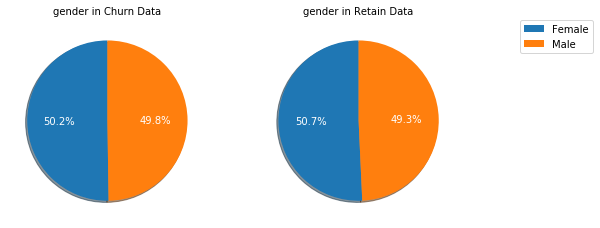

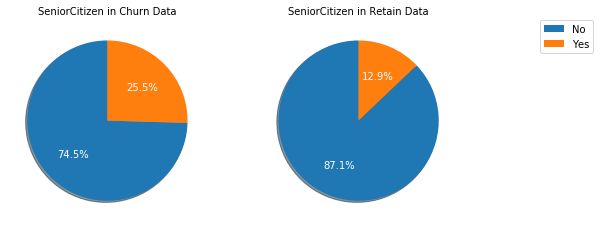

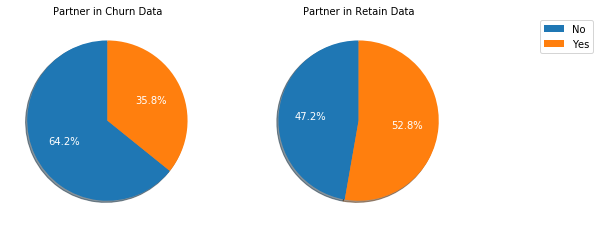

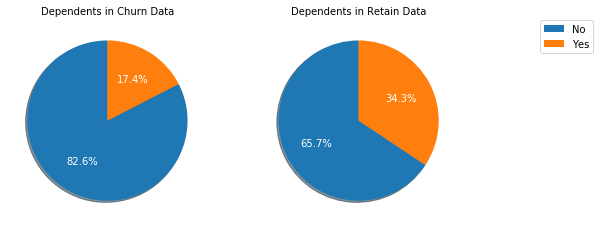

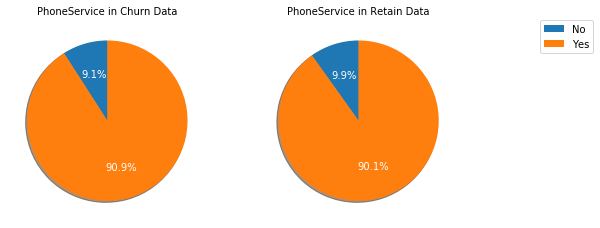

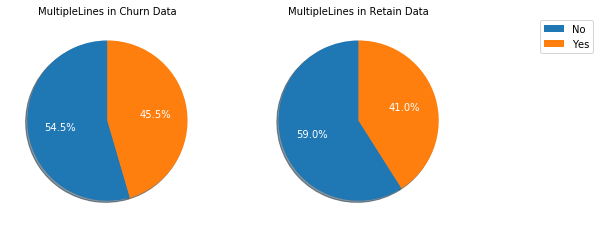

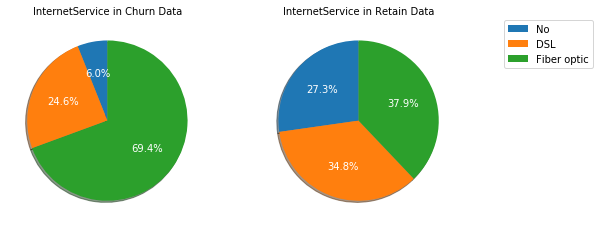

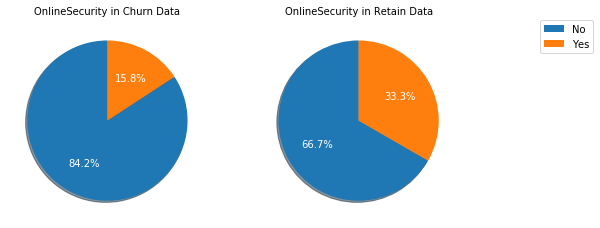

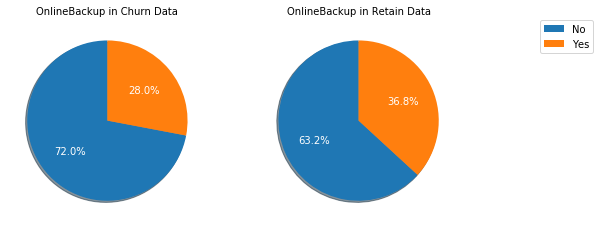

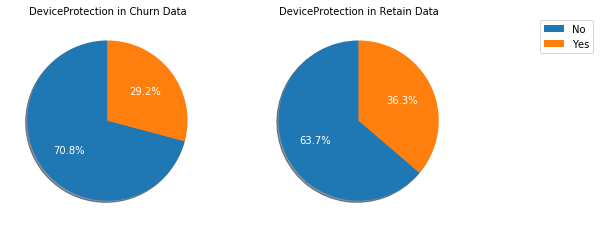

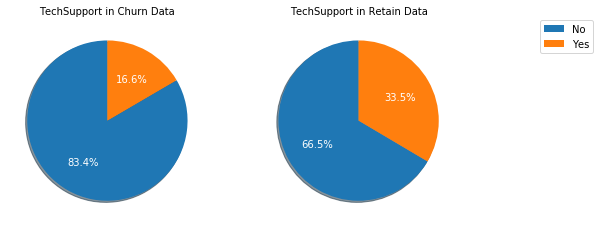

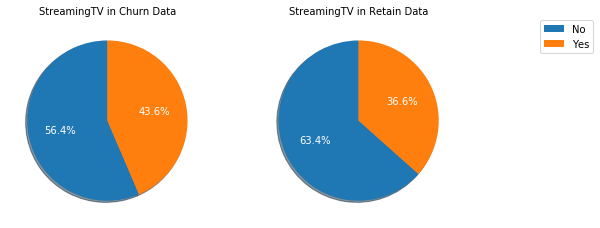

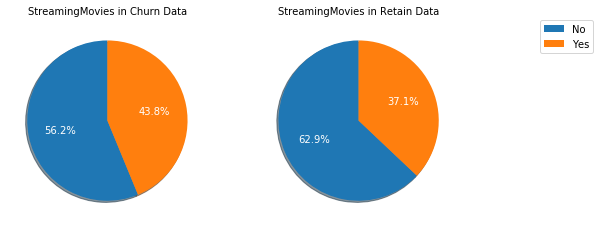

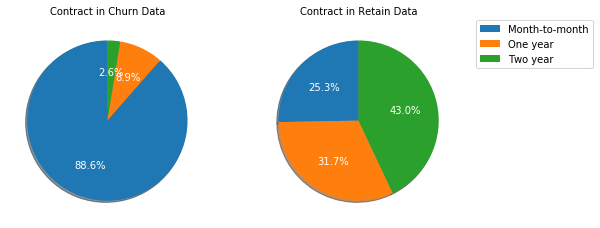

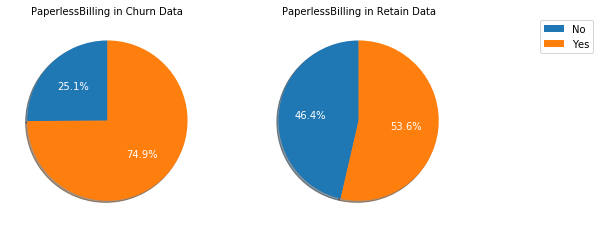

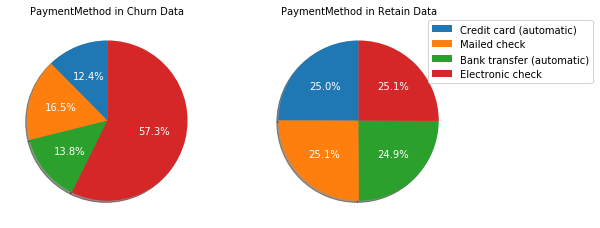

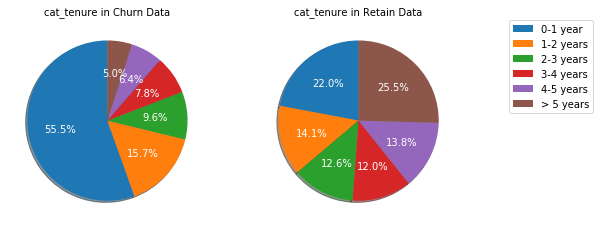

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
for col in categorical_cols:
    plot_two_pie_charts(churn,retain,col)


    Gender might not be a good feature to predict churn since there is no difference of % Male and % Female.
    More % of Senior citizen in churned users compared to the of in retained users.
    % of using phone service in churned users and and of in retained users were almost the same.
    Users using online services (online Security and Online Backup) and supports (Device protection, TechSupport, Streaming TV and Streaming Movies)tend to retain. Using no InternetService users tend to retain. Fiber optic Internet Service is popular, but it needs to be looked over since there is higher Fiber optic rate for churned users.
    Most of churned users contract was Month-to-Month. This feature might be useful to predict the user retention.
    Users using paperless billing tend to be churned.
    

In [15]:
#tele.groupby('InternetService')['MonthlyCharges'].mean()
print(churn.groupby('InternetService')['MonthlyCharges'].mean(), '\n')
print(retain.groupby('InternetService')['MonthlyCharges'].mean())

# Fiber optic's price is much higher compared to other Internet Services

InternetService
DSL            49.083224
Fiber optic    88.126484
No             20.368142
Name: MonthlyCharges, dtype: float64 

InternetService
DSL            60.200026
Fiber optic    93.932379
No             21.133156
Name: MonthlyCharges, dtype: float64


### Distribution of Tenure Categories by Churn

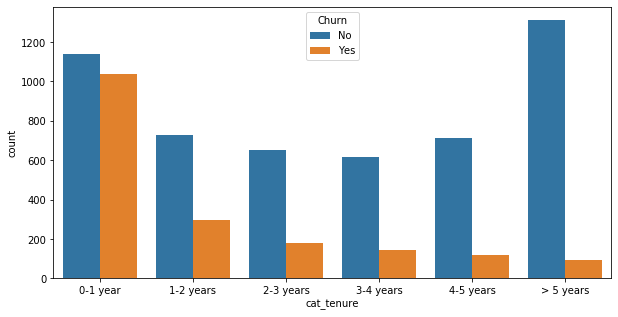

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='cat_tenure', hue='Churn', data=tele)

    Users with longer tenure (more than a year) tend to be retained.

### Boxplots of Monthly Charges by Tenure Categories

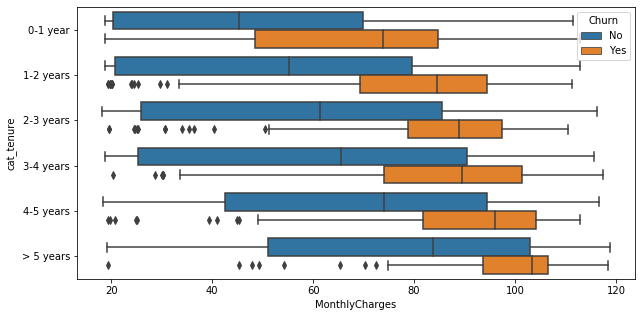

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="MonthlyCharges", y="cat_tenure", hue='Churn', data=tele)
plt.legend(loc='upper right', title='Churn')


    Churned users have larger average amount of total charges for the services compared to retained users. Total Charges is a huge factor to determine churn of users.  

### Hypothesis Testing to see Difference of Mean MonthlyCharges

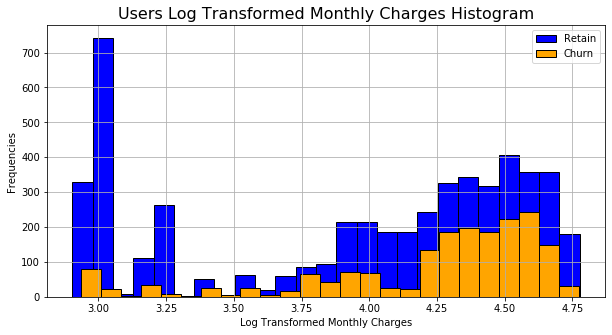

In [18]:
# Check the distributions of retained and churned users to see if H.T. assumption is satisified
# Plots are skewed right/ exponentially distributed. Normality can be assumed
plt.figure(figsize=(10,5))
plt.title("Users Log Transformed Monthly Charges Histogram",fontsize=16)
log(retain['MonthlyCharges']).hist(edgecolor='k',color='blue',bins=25)
log(churn['MonthlyCharges']).hist(edgecolor='k',color='orange',bins=25)
plt.xlabel('Log Transformed Monthly Charges')
plt.ylabel('Frequencies')
plt.legend(labels=['Retain','Churn'])
plt.show()

In [19]:
from statsmodels.stats import weightstats
# Assumption: Two samples are independent and identically distributed
# Greater than 30 samples --> Using z-test instead of t-test.
# Two groups have different standard deviations. Independent Z_test conducted
# Ho: Retain and Churn users significantly have the high prob of the same average Monthly Charges
# H1: Retain and Churn users do not significantly have the high prob of the same average Monthly Charges
cm = weightstats.CompareMeans.from_data(retain['MonthlyCharges'].values, churn['MonthlyCharges'].values)
z_stat, p = cm.ztest_ind(usevar='unequal')
print("t_stat is {0:.2f} and p_value is {1}".format(z_stat,p))

if p < .05:
    print('p-value is less than the significant, we reject the null hypothesis')
else:
    print('p-value is larger than the significant, we fail to reject the null hypothesis')

t_stat is -18.34 and p_value is 3.901472477192827e-75
p-value is less than the significant, we reject the null hypothesis


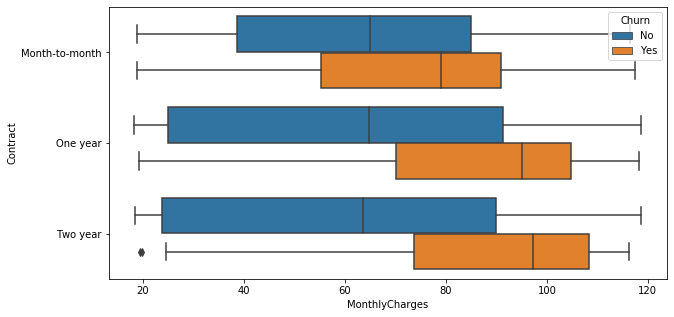

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x="MonthlyCharges", y="Contract", hue='Churn', data=tele)
plt.legend(loc='upper right', title='Churn')

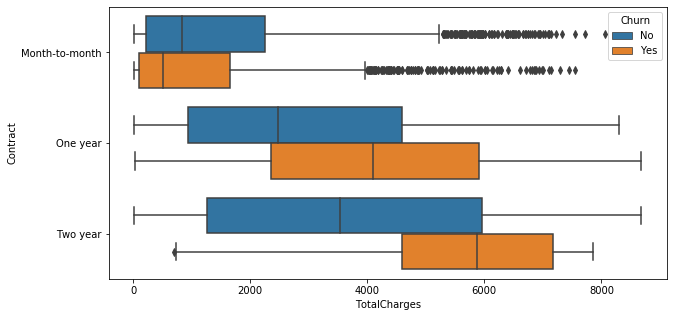

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x="TotalCharges", y="Contract", hue='Churn', data=tele)
plt.legend(loc='upper right', title='Churn')

    There is a huge difference of total charges/ monthly charges in one-year contract and two-year contract.
    Churned users pay more total charges than retained users.  However, churned users paying monthly pays less than retained users. Need to look at monthly data

### Distribution Plots for Monthly Charges, Total Charges and Tenure

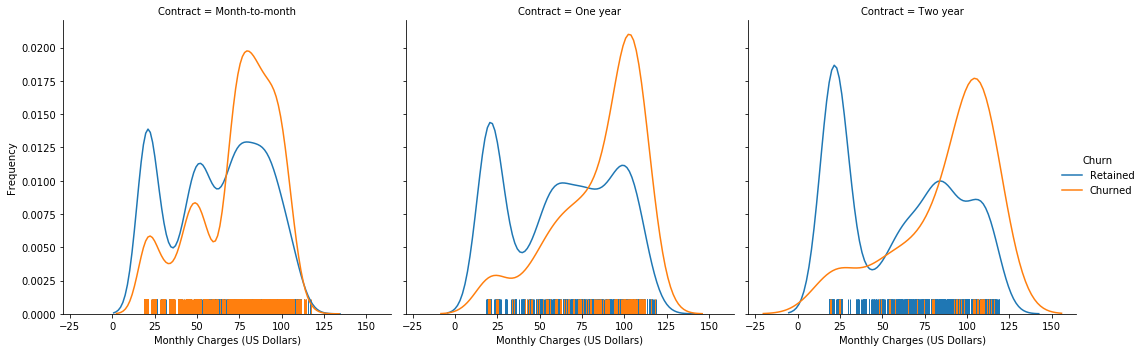

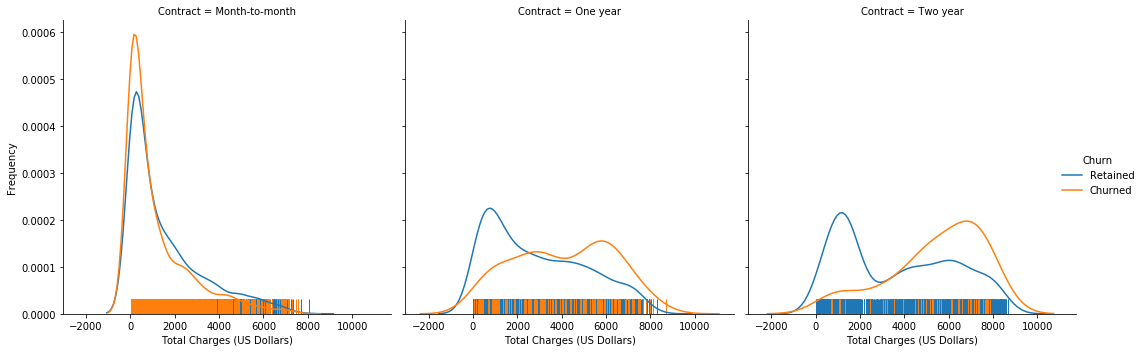

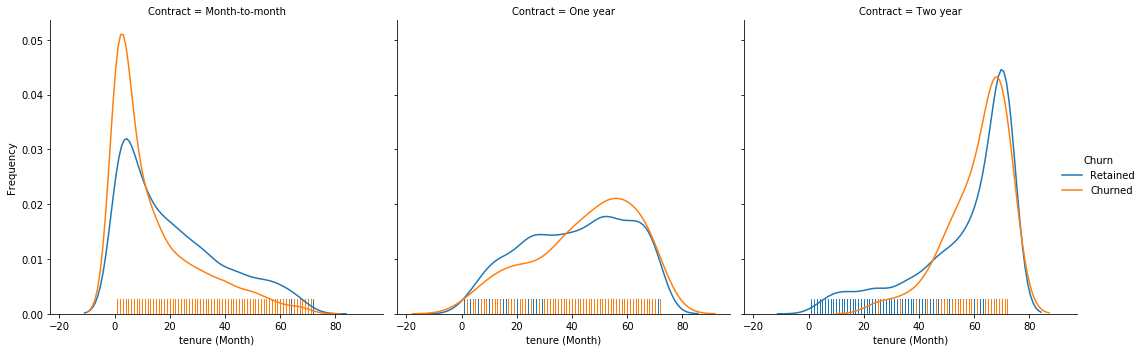

In [22]:
g_contract = sns.FacetGrid(tele, col="Contract", hue='Churn',height=5,)
g_contract.map(sns.distplot, "MonthlyCharges", hist=False, rug=True)
g_contract.set_axis_labels("Monthly Charges (US Dollars)", "Frequency")
g_contract.add_legend()
g_contract._legend.texts[0].set_text("Retained")
g_contract._legend.texts[1].set_text('Churned')


g_tot_contract = sns.FacetGrid(tele, col='Contract', hue='Churn', height=5)
g_tot_contract.map(sns.distplot, 'TotalCharges', hist=False, rug=True)
g_tot_contract.set_axis_labels("Total Charges (US Dollars)", "Frequency")
g_tot_contract.add_legend()
g_tot_contract._legend.texts[0].set_text("Retained")
g_tot_contract._legend.texts[1].set_text('Churned')

g_ten_contract = sns.FacetGrid(tele, col='Contract', hue='Churn', height=5)
g_ten_contract.map(sns.distplot, 'tenure', hist=False, rug=True)
g_ten_contract.set_axis_labels("tenure (Month)", "Frequency")
g_ten_contract.add_legend()
g_ten_contract._legend.texts[0].set_text("Retained")
g_ten_contract._legend.texts[1].set_text('Churned')

    For Two-year contract users who pay less monthly charges and total charges tend to stay more than the one who pay higher the charges. Also, Month-to-Month contractors tend to be churned in short amount of time compared to other contractors. Users with longer contracts are usually retained more than two years.
    Users pay monthly-charges between 75 dollars and 100 dollars tend to be churned.

### Scatter Plots of Monthly Charges vs. Total Charges by Tenure Categories

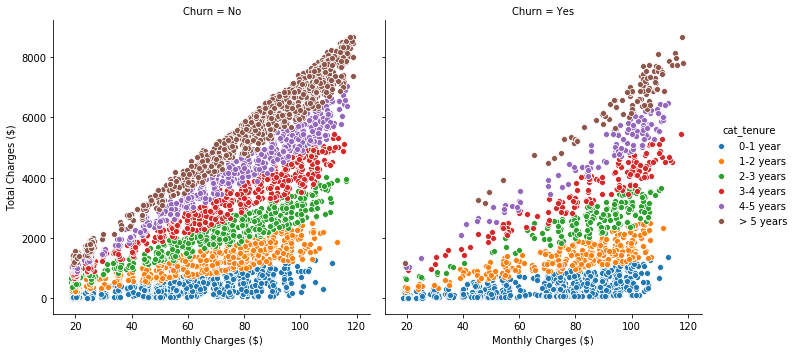

In [23]:
g_tenure_scatter = sns.FacetGrid(tele, col='Churn', hue='cat_tenure', height=5)
g_tenure_scatter.map(sns.scatterplot,'MonthlyCharges', 'TotalCharges')
g_tenure_scatter.set_axis_labels("Monthly Charges ($)", "Total Charges ($)")
g_tenure_scatter.add_legend()

Users who retained longer tend to pay larger amount of Total Charges and Monthly Charges.
\

### Scatter Plot of Monthly Charges vs. Total Charges based on Churn

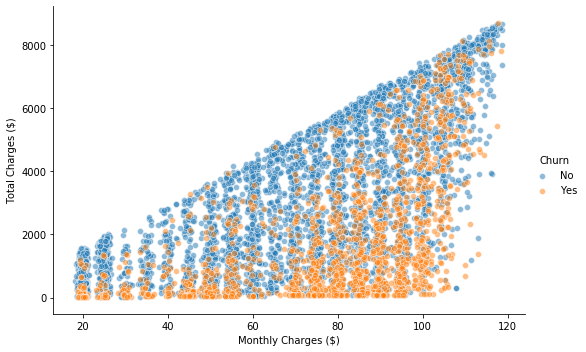

In [24]:
g_churn_scatter = sns.FacetGrid(tele, hue='Churn', height=5, aspect=1.5)
g_churn_scatter.map(sns.scatterplot,'MonthlyCharges', 'TotalCharges',alpha=.5)
g_churn_scatter.set_axis_labels("Monthly Charges ($)", "Total Charges ($)")
g_churn_scatter.add_legend()

## Data Preprocessing

In [58]:
def converting_binary_int(tele):
    copy = tele.copy()
    no_service_cols = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

    yes_no_cols = no_service_cols + ['Partner','Dependents','PhoneService','SeniorCitizen','PaperlessBilling','Churn']

    for col in yes_no_cols:
        copy[col] = copy[col].map({'Yes':1, 'No':0})
    copy['gender'] = copy['gender'].map({"Male":1, "Female":0})
    
    binary_cols = yes_no_cols + ['gender']
    return copy[binary_cols]

binary_tele = converting_binary_int(tele)
survival_df = binary_tele.copy()
logic = [columns not in survival_df.columns.tolist() for columns in tele.columns.tolist()]
not_binarized = tele.columns[logic].tolist()
survival_df[not_binarized] = tele[not_binarized]

## Survival Analysis

Using Non-parametric method, Kaplan-Meier Estimator to calculate the estimated survival probability based on time of events.

$n_{i}$ represents the least number of risk at time just prior to time $t_{i}$. 

$d_{i}$ represents the number of users churned occured at time $t_{i}$

$$ \hat S(t) =\prod_{i:t_{i}\leq t} \frac{n_{i}-d_{i}}{n_{i}} $$

In [59]:
def kmf_plot(kmf, time, event, groups):
    """ Input: kmf - KaplanMeierFitter from lifelines library
               time - timeline in the data
               event - a record of events
               groups - group to see difference
        Output: Plots of estimated users retain probability over the timeline
        
    """
    

    unique_eles = np.unique(groups)
    index_unique_eles = [groups == ele for ele in unique_eles]
    for i in range(0,len(unique_eles)):
        if i == 0:
            kmf.fit(time[index_unique_eles[i]], event[index_unique_eles[i]], label=unique_eles[i])
            a1 = kmf.plot()
            a1.set_ylabel('Estimated Users Retain Probability')
            a1.set_title ('Users grouped by ' + groups.name )
        else:
            kmf.fit(time[index_unique_eles[i]], event[index_unique_eles[i]], label =unique_eles[i])
            kmf.plot(ax=a1)
    plt.show()
    

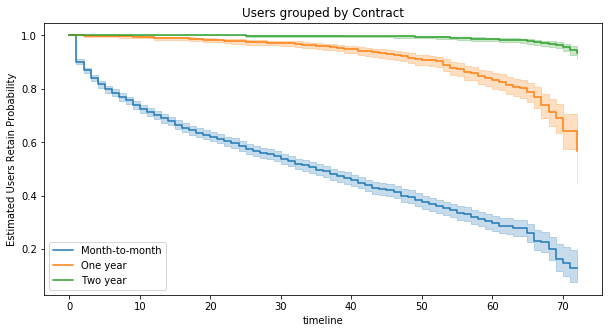

In [60]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf_plot(kmf,survival_df['tenure'],survival_df['Churn'],survival_df['Contract'])

    Survival probability of customers paying month-to-month decreses quadratically in first 30 months. Then decreases linearly between (30,50) months. Lastly, after 60 months, the survival probability started to decrease dramatically. 
    Customers paying month-to-month and using services for a long time should have got a promotion. Retaining a customer is cheaper than getting a new customer.
    However, customers paying longer contracts have a higher survival proability and relatively stable.
    After 60 months, the survival probability of customers paying yearly decreases more dramatically than of customer paying monthly.
    Overall, customers using the service more than 5 years, should get a promotion/service to be retained.

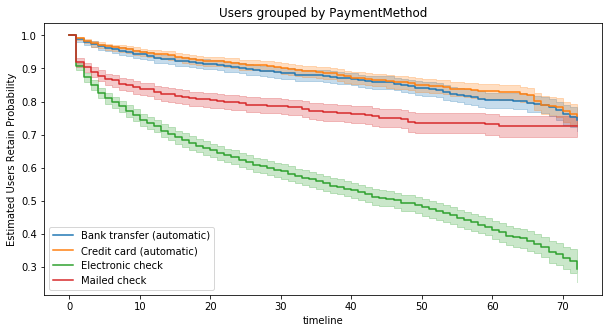

In [61]:
kmf_plot(kmf,survival_df['tenure'],survival_df['Churn'],survival_df['PaymentMethod'])

### Cox Proportional Hazard Model
    Using features to gain more information about the survival probability. We are interested in S(tenure > t| features), i.e. given features what will be the survival probability when tenure > t.
    

In [62]:
from lifelines import CoxPHFitter
# Subset of column that might increases the survival probability
cox_df= survival_df[['tenure','Churn','Dependents','InternetService','MonthlyCharges','PhoneService','StreamingTV']]
cox_df.head() 

,tenure,Churn,Dependents,InternetService,MonthlyCharges,PhoneService,StreamingTV
customerID,,,,,,,
7590-VHVEG,1,0,0,DSL,29.85,0,0
5575-GNVDE,34,0,0,DSL,56.95,1,0
3668-QPYBK,2,1,0,DSL,53.85,1,0
7795-CFOCW,45,0,0,DSL,42.30,0,0
9237-HQITU,2,1,0,Fiber optic,70.70,1,0


In [96]:
cph = CoxPHFitter()
cox_df_dummy = pd.get_dummies(cox_df, drop_first=True)
cph.fit(cox_df_dummy, 'tenure', event_col='Churn')
cph.print_summary()    

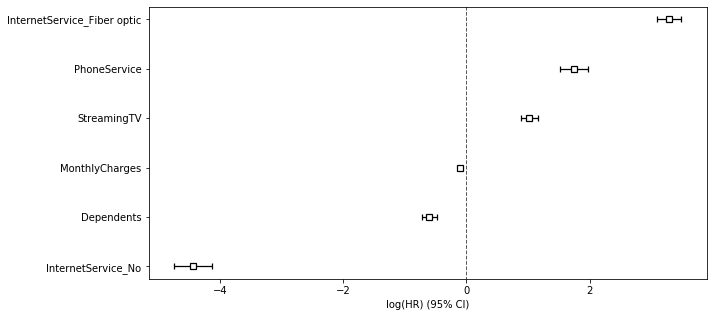

In [64]:
cph.plot(ax=figsize(10,5))

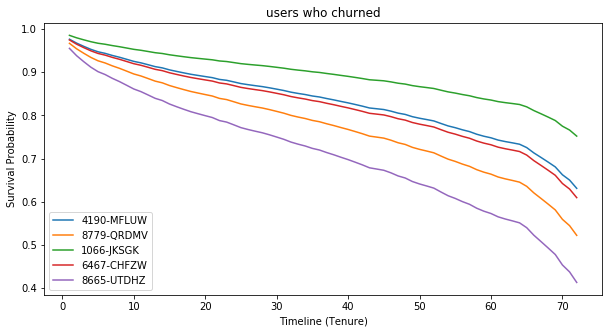

In [97]:
churn_rows = cox_df_dummy[cox_df_dummy['Churn'] == 1].iloc[5:10, 2:]
cph.predict_survival_function(churn_rows).plot()
plt.title('users who churned')
plt.xlabel('Timeline (Tenure)')
plt.ylabel('Survival Probability')
plt.show()

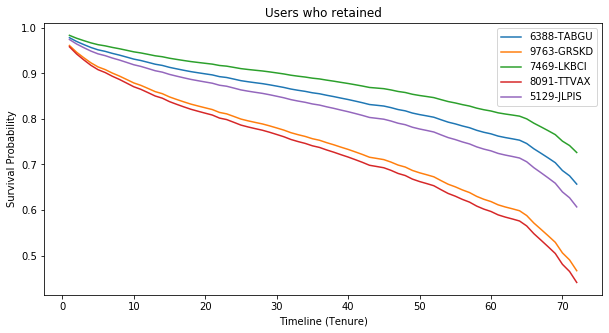

In [98]:
retain_rows = cox_df_dummy[cox_df_dummy['Churn'] == 0].iloc[5:10, 2:]
cph.predict_survival_function(retain_rows).plot()
plt.title('Users who retained')
plt.xlabel('Timeline (Tenure)')
plt.ylabel('Survival Probability')
plt.show()

### Normalizing Numerical Columns

In [66]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


def normalize_columns(scaler, data, features):
    """ Input: scaler - Scaler normalizing features
               data - DataFrame
               features - features to transform
        Output: Dataframe of transformed features
    """
    scaled = scaler.fit_transform(data[features])
    scaled = pd.DataFrame(scaled, index=data.index, columns=features)
    return (scaled)

binary_tele = converting_binary_int(tele)

numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
categorical_cols = ['InternetService','PaymentMethod']
labeler = LabelEncoder()
scaler = StandardScaler()
scaled = normalize_columns(scaler, tele, numerical_cols)
labeled = labeler.fit_transform(tele['Contract']) # Used LabelEncodeer for Contract since longer contract term lowers churn

#numerics = tele[numerical_cols]
ohe_df = pd.get_dummies(tele[categorical_cols])
ohe_df['Contract'] = labeled
binary_df = binary_tele.drop('Churn',axis=1)

X = pd.concat([scaled,ohe_df, binary_df], axis=1)
y = binary_tele['Churn']
assert X.shape[1] == len(scaled.columns) + len(ohe_df.columns) + len(binary_df.columns)

### Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

    By using stratify=y, we can solve the problem of imbalanced data. 26.6% of total users were churned.
    Also, y_train and y_test have the similar amount of churned users

In [68]:
# Startify y to keep similiar number of churned users.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

### Summary of Features

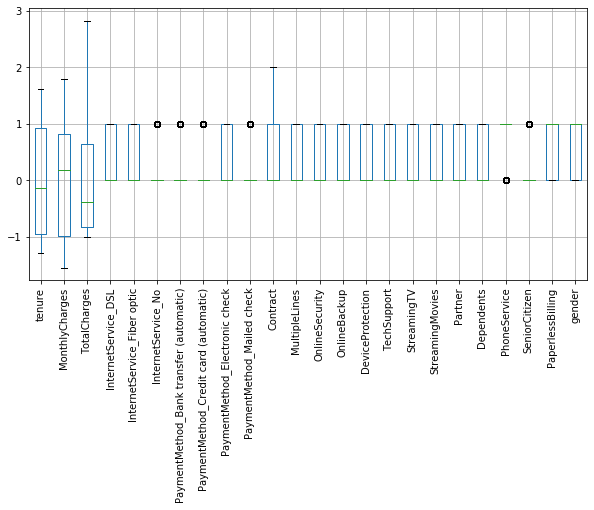

In [69]:
X_train.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

### Heatmap Correlation

In [70]:
def upper_heatMap(df):
    """ Input df - A Dataframe to describe each of features correlation
    """
    corr = df.corr()
    # Return Upper Triangular Correlation Matrix, since corr matrix is symmetric.
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set Figures
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate Heat Map based on Correlation
    sns.heatmap(corr, mask=mask, cmap=colormap, annot=True, annot_kws={"fontsize":8}, fmt=".2f")

    # Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns)
    # Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    # Show plot
    plt.show()
    

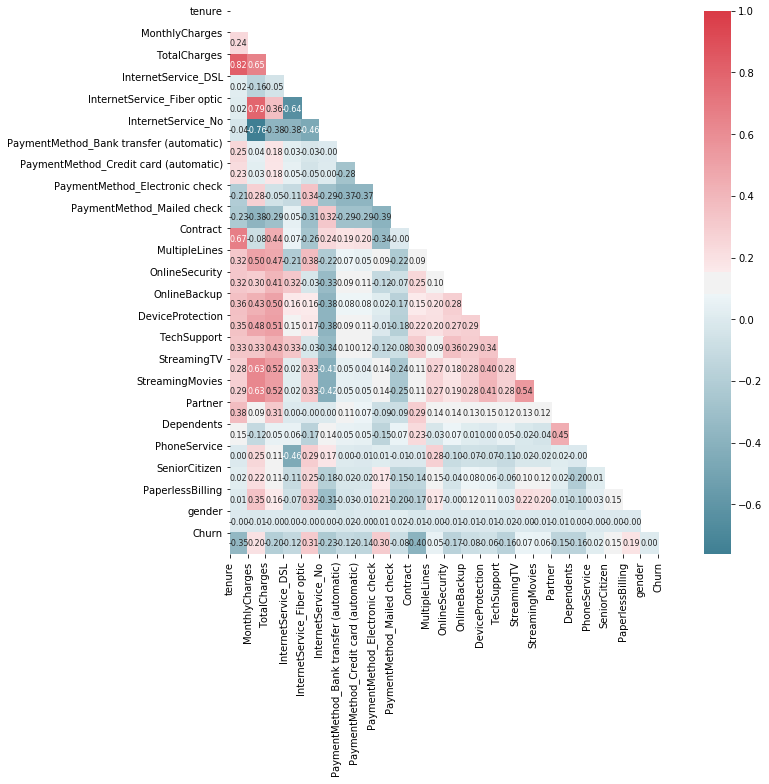

In [71]:
train_tele = X_train.copy()
train_tele['Churn'] = y_train.copy()
upper_heatMap(train_tele)

    MonthlyCharges and TotalCharges are highly correlated in a sense of user's spending. Need to decorrelate those features to prevent noise from our models. Having more services correlates to higher monthly charges.

    However, correlation ranges from -1 to 1 and provides if there is a strong linear relationship between a feature and a target variable. Correlation won't be able to detect non-linear relationships. Correlation is a symmetric matrix. Nevertheless, in real-world examples, relationships between features are asymmetric. For instance, a column with 3 unique values won't be able to perfectly predict another column with 120 unique values.  The classifier can be a naive model, predicting the highest majority of class.

### Predictive Power Score

    I will use Predictive Power Score using f1-score in this classification problem to calculate the relationship of each variables to the target.
    Extract f1-score achieved by the model, predicting the target variable and compare it to its baseline f1-score via always predicting a user will be retained. By normalizing with these two metrics, 
$$PPS =\frac{F_{1m} - F_{1b}}{1-F_{1b}}$$  Where $F_{1m}$ : f1-score achieved by the model
                                                 $F_{1b}$ : f1-score achieved by the baseline model

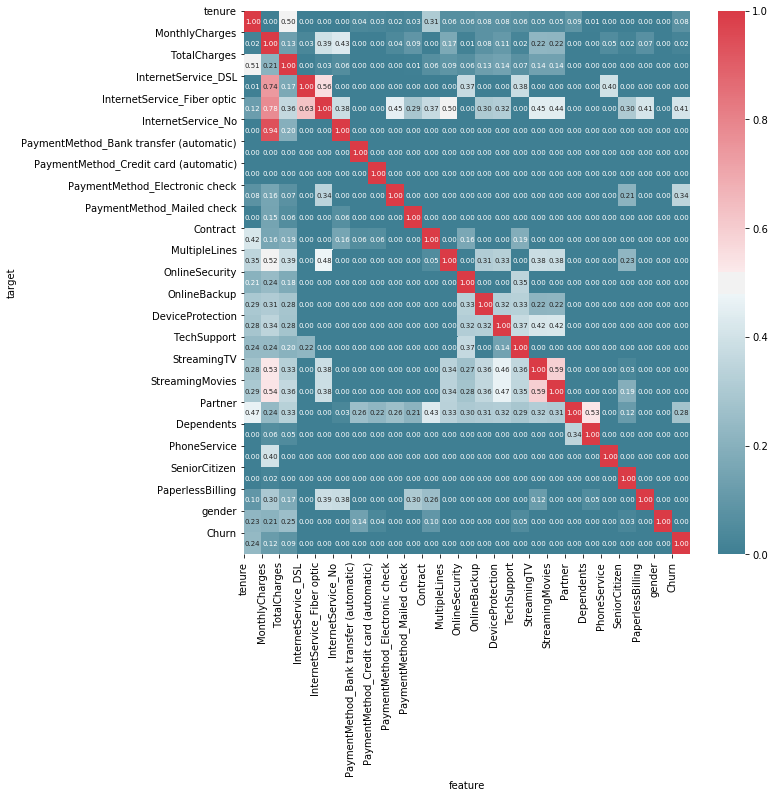

In [72]:
import ppscore as pps
pps_matrix = pps.matrix(train_tele)
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(pps_matrix,cmap=colormap, annot=True, annot_kws={"fontsize":7}, fmt=".2f")

# Apply xticks
plt.xticks(range(len(pps_matrix.columns)), pps_matrix.columns)
plt.xlabel('feature')
# Apply yticks
plt.yticks(range(len(pps_matrix.columns)), pps_matrix.columns)
plt.ylabel('target')
# Show plot
plt.show()

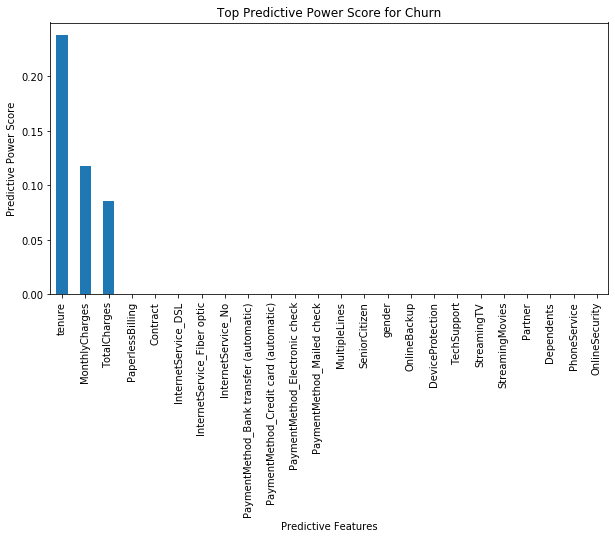

In [73]:
pps_matrix.loc['Churn'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,5))
plt.xlabel('Predictive Features')
plt.ylabel('Predictive Power Score')
plt.title('Top Predictive Power Score for Churn')
plt.show()

    Tenure, MonthlyCharges and TotalCharges are strongly related to Churn compared to other features.

### Summarize Features using PCA (Extracting Origin-Characteristic of Features using Eigenvalues)

In [74]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2)
pcs = pca2.fit_transform(X)
pca2_data = pd.DataFrame(pcs,index=X.index,columns = ["PC1","PC2"])

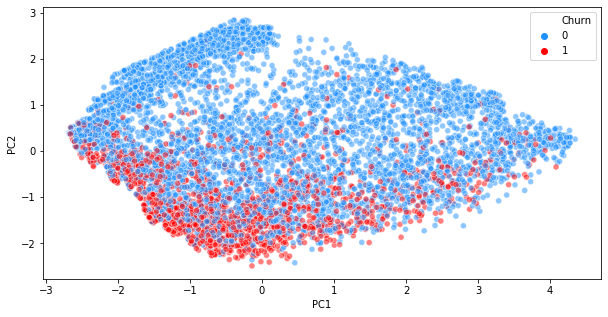

In [75]:
merged_pca_data = pca2_data.merge(y, left_index=True,right_index=True)
plt.figure(figsize=(10,5))
sns.scatterplot(x='PC1',y='PC2',hue='Churn', data=merged_pca_data, alpha=.5, palette=['dodgerblue','red'])

In [76]:
sum(pca2.explained_variance_ratio_)

0.5603702979342248

     2 Principal Components features only explains 54% variance of original features' information. To capute higher variance, I increased number of PCs and recored accuracy to find out the optimum number of PC.


## Modeling

In [77]:
import matplotlib.gridspec as gridspec
import joblib

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb

In [78]:
def plot_auc_curve(y_test, pred_prob, pred, ax):
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    roc_auc = roc_auc_score(y_test,pred)
    plt.figure(figsize=(5,5))
    ax.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [79]:
def plot_coef_importance_summary(columns, model, ax):
    """ Input: columns - lists to extract coefficient or feature importance
               model - a classification model
               ax - ax to show the plot
        Output: Coef/Feature Importance Summary Plot
    """
    if hasattr(model, 'feature_importances_') :
        feature_impo = np.stack((columns,model.feature_importances_.reshape(-1)))
        coef_summary = pd.DataFrame(feature_impo).T
        coef_summary.columns = ['features','feature_importantance']
        coef_summary = coef_summary.sort_values('feature_importantance',ascending=False)
        
        sns.barplot(x='features', y='feature_importantance', data=coef_summary, ax=ax)
        ax.set_xticklabels(coef_summary['features'],rotation=90)
        ax.set_title('Features Importance')
    else:
        coef = np.stack((columns, model.coef_.reshape(-1)))
        coef_summary = pd.DataFrame(coef).T
        coef_summary.columns = ['features','coefficient']
        coef_summary = coef_summary.sort_values('coefficient',ascending=False)
        
        sns.barplot(x='features', y='coefficient', data=coef_summary, ax=ax)
        ax.set_xticklabels(coef_summary['features'],rotation=90)
        ax.set_title("Features Coefficients")

In [80]:
def pca_transform(model, X_train, X_test, y_train, y_test, n):
    """ Input: model - model to predict y_test
               X_train - Feature Train Set (pd.DataFrame)
               X_test - Feature Test Set (pd.DataFrame)
               y_train - Response Train Set (list/series)
               y_test -  Response Test Set (list/series)
               n - number of pca components
              
        Output: y_predict - predicted y (list/series)
                prob - probability of being predicted as y (list/series)
                var_explained - total variance explained (float)
    """
    pca = PCA(n_components=n)
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.transform(X_test)
    model.fit(pca_train,y_train)
    
    pred = model.predict(pca_test)
    prob = model.predict_proba(pca_test)
    
    var_explained = sum(pca.explained_variance_ratio_)
    return (pred, prob, var_explained)

def plot_pca_transform_var(model, X_train, X_test, y_train, y_test, n=20):
    """ 
        Input: model - model to predict y_test (classifier)
               X_train - Feature Train Set (pd.DataFrame)
               X_test - Feature Test Set (pd.DataFrame)
               y_train - Response Train Set (list/series)
               y_test -  Response Test Set (list/series)
               n - max number of pca components
              
        Output: Two plots based on N principal components to accuracy and on variance explained to accuracy
    """
    
    acc = []
    var_explained = []

    for i in range(1,n+1):
        pred, prob, var_explain= pca_transform(model, X_train, X_test, y_train, y_test, i)
        accuracy = accuracy_score(y_test,pred)
        var_explained.append(var_explain)
        acc.append(accuracy)
    
    index = acc.index(max(acc))
    fig,ax = plt.subplots(1,2, sharey=True, figsize=(15,5))
    ax[0].plot(var_explained,acc)
    ax[0].set_xlabel("Variance Explained")
    ax[0].set_ylabel('Accuracy')
    ax[0].set_title("Var. Explained vs Accuracy")
    ax[1].plot(np.arange(1,n+1), acc)
    ax[1].set_xlabel('N Principal Components')
    ax[1].set_ylabel("Accuracy")
    ax[1].set_xticks(np.arange(1,n+1, 1.0))
    ax[1].set_title('N Prinicpal Components vs Accuracy')
    
    plt.show()
    print("Maximum Accuracy {1:.2f} was achieived using {0} Principal Components".format(index,max(acc)))
    print("Total variance explained with {0} Principal Components was {1:.2f}".format(index,var_explained[index]))

In [81]:
def classifier_model_reports(model, X_train, y_train, X_test, y_test):
    """ Input: model - model to predict y_test ex) Logistic Regression / Random Forest
               X_test - Features Test Set (pd.DataFrame)
               y_test - Response Test SEt (list/series)
               
              
    """
    print(model)
    model.fit(X_train,y_train)
    
    pred = model.predict(X_test)
    churn_prob = model.predict_proba(X_test)[:,1]  
    
    print('Classification Report: \n ')
    print(classification_report(y_test,pred))
    
    acc = accuracy_score(y_test,pred)
    print('Accuracy Score: {0:.3f}'.format(acc))
    
    f1 = f1_score(y_test,pred)
    print('F1 Score: {0:.3f}'.format(f1))
    cv_mean = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print('5 Splits Cross Validation average acc: {0:.3f}'.format(cv_mean))
    print('\n')
    # Create 2x2 sub plots
    fig2 = plt.figure(figsize=(15,10))
    spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
    f2_ax1 = fig2.add_subplot(spec2[0, 0])
    f2_ax2 = fig2.add_subplot(spec2[0, 1])
    f2_ax3 = fig2.add_subplot(spec2[1,:])
    
    cm = confusion_matrix(y_test, pred, normalize='true')
    sns.heatmap(cm,ax=f2_ax1, annot=True, fmt='.2%', cmap='Blues',xticklabels=['Retain','Churn'],
                yticklabels=['Retain','Churn'])
    f2_ax1.set_xlabel('Predicted Label')
    f2_ax1.set_ylabel('True Label')
    f2_ax1.set_title('Confusion Matrix')
    plot_auc_curve(y_test,churn_prob, pred, f2_ax2)
    plot_coef_importance_summary(X_test.columns, model, f2_ax3)
    plt.show()

### Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy Score: 0.804
F1 Score: 0.606
5 Splits Cross Validation average acc: 0.803




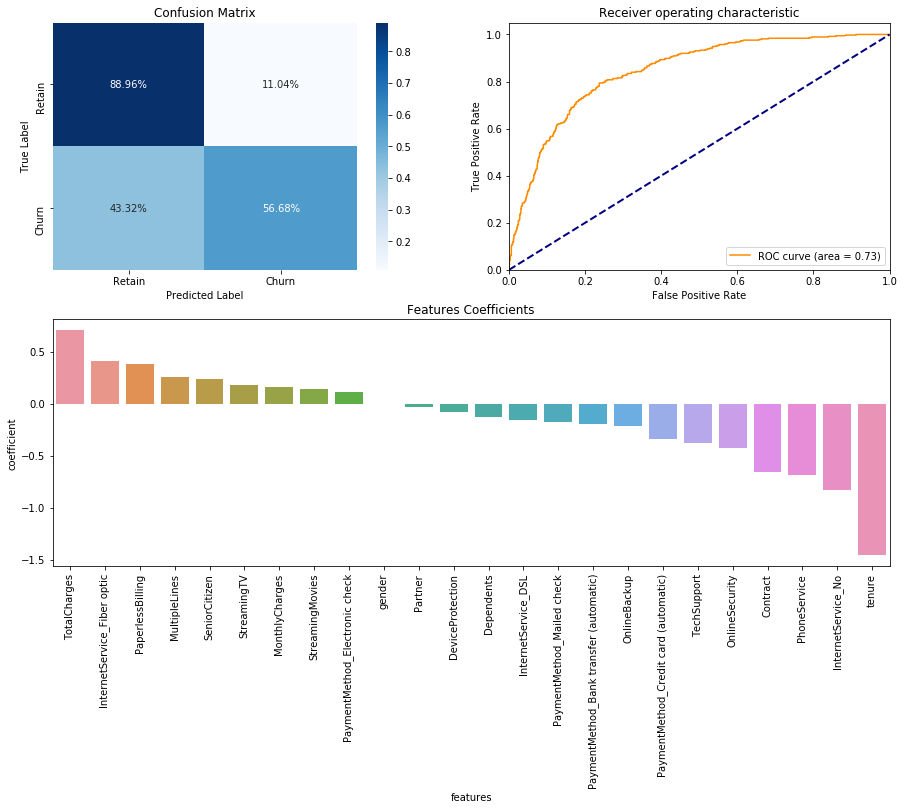

<Figure size 360x360 with 0 Axes>

In [82]:
# For small datasets, ‘liblinear’ is a good choice and using ridge regression
logisticRegr = LogisticRegression(solver='liblinear', penalty='l2')                 
classifier_model_reports(logisticRegr, X_train, y_train, X_test, y_test)

    Decreasing FN/(model predicted a user is retained but actually churned) will be a key metric to increase the re-call. Marking a user as churned but actually retained won't be a huge loss compared to marking a user as retained but actually churned.
    Since the data consists of unbalanced class (Retained:73.4% and Churned 26.6%), classifiers can get a low misclassification rate simply by choosing the majority class (Retained). The F1 score can be interpreted as a weighted average of the precision and recall. Since I want higher the recall, the model with higher f1 score should be selected
 

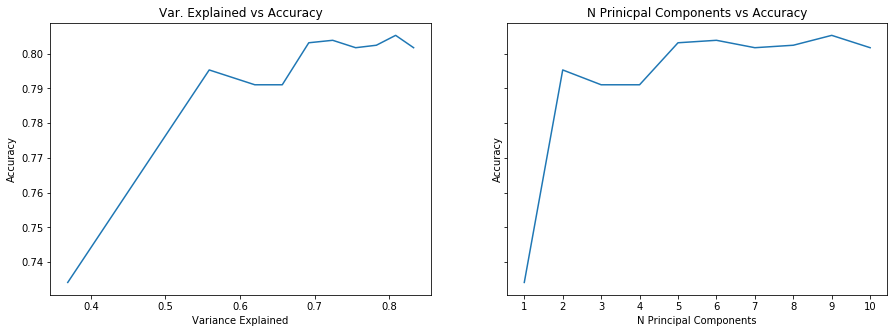

Maximum Accuracy 0.81 was achieived using 8 Principal Components
Total variance explained with 8 Principal Components was 0.81


In [83]:
plot_pca_transform_var(logisticRegr, X_train, X_test, y_train, y_test, 10)

#### Feature Selection using Lasso "l1"


L2 regularisation does not shrink coefficients to zero

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy Score: 0.803
F1 Score: 0.605
5 Splits Cross Validation average acc: 0.804




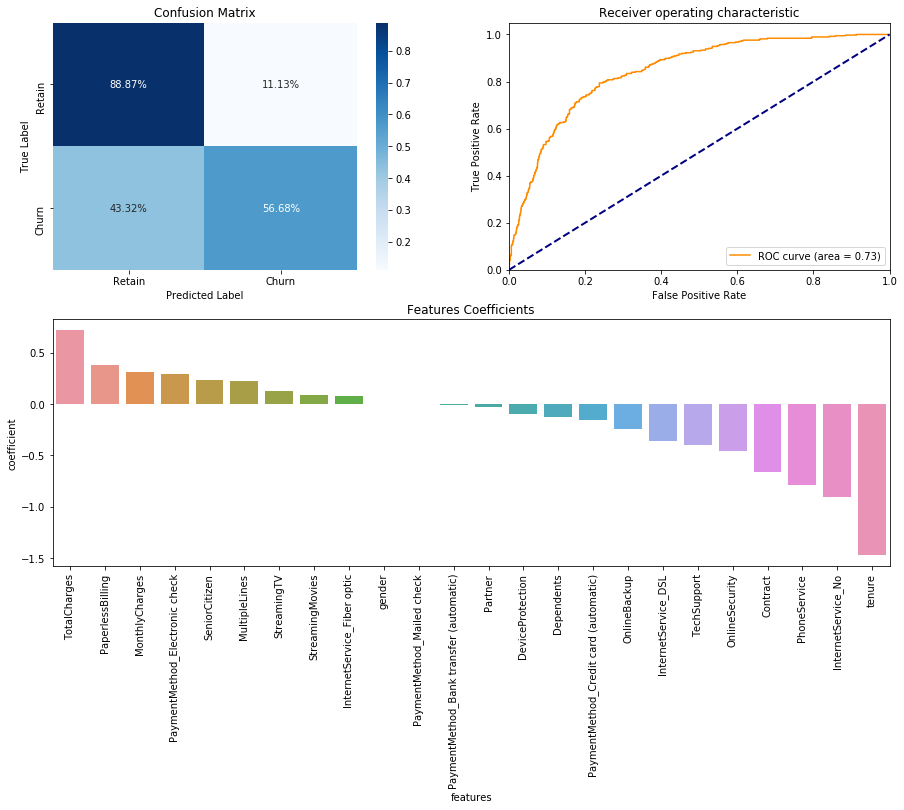

<Figure size 360x360 with 0 Axes>

In [84]:
logisticRegr_1 = LogisticRegression(solver='liblinear', penalty='l1')                 
classifier_model_reports(logisticRegr_1, X_train, y_train, X_test, y_test)

    Having less features will advance the model's complexity by removing zero-coefficient features.
    We could have acheived a similar result to the previous Logistic Regression containing all features.
    However, the current model has less complexity and so will be optimal.
    I will incldue InternetService_Fiber optic since its coefficient for Ridge Regression is relatively high.

In [85]:
# Dropping all irrelevant features of Churn
X_new = X.drop(['PaymentMethod_Mailed check','Partner', 'StreamingTV','PaymentMethod_Bank transfer (automatic)',
                'PaymentMethod_Credit card (automatic)','gender'], axis=1)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new,y, test_size=.2, stratify=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.55      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy Score: 0.809
F1 Score: 0.603
5 Splits Cross Validation average acc: 0.804




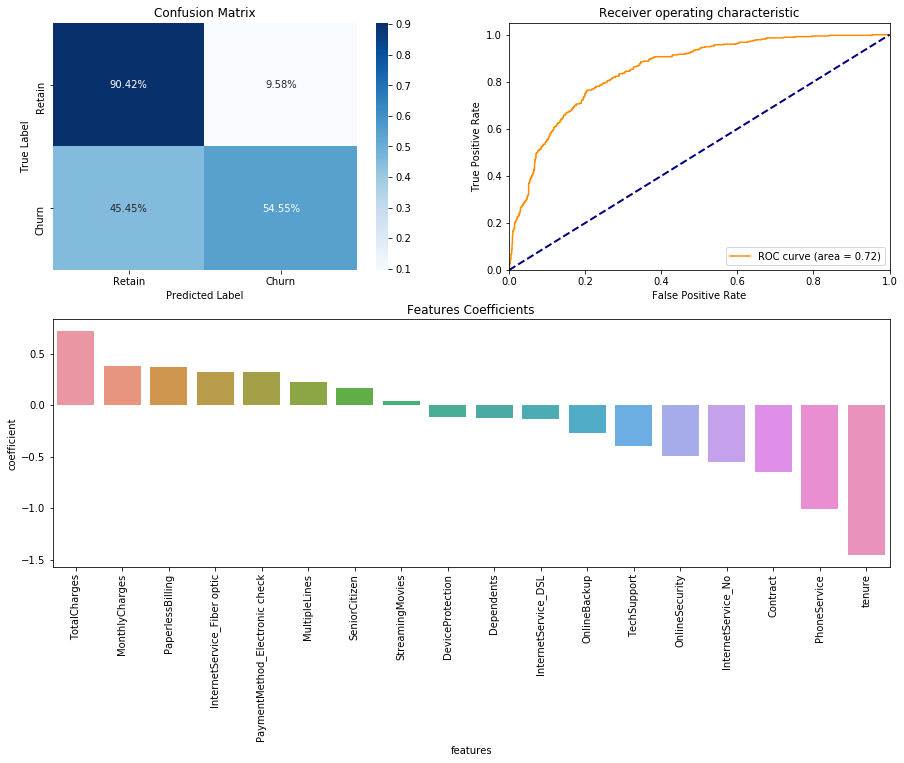

<Figure size 360x360 with 0 Axes>

In [86]:
classifier_model_reports(logisticRegr, X_new_train, y_new_train, X_new_test, y_new_test)

    After selecting subset of features, the recall rate decreases from .58 to .53. 
    The current logistic regression with l2 model has less complexity, so it will be the best to use A/B Testing to see which models predict less false negatives.

### Random Forest (Ensembling Method)

    Using the criterion as entropy, the RF quantifies expected information in a set of possible outcomes.
    Entropy can be interpreted as expected uncertainty associated with the set of events [retain, churn].
    It is better to transform binarized features to ohe to have more supporting features in Ensembling Methods.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score: 0.787
F1 Score: 0.560
5 Splits Cross Validation average acc: 0.806




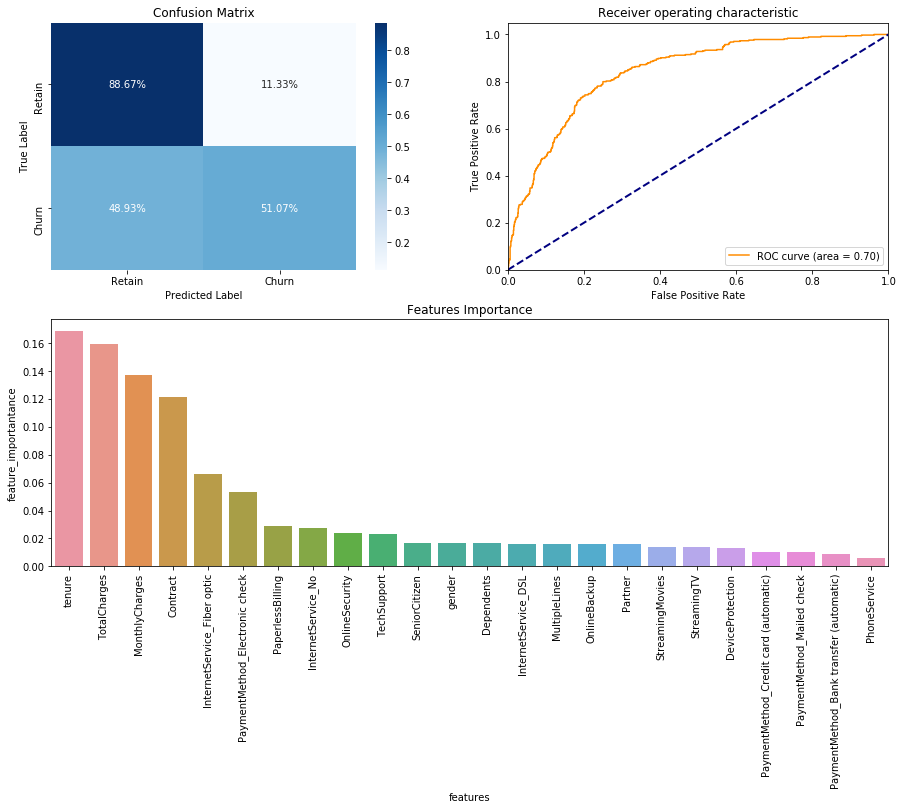

<Figure size 360x360 with 0 Axes>

In [87]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=10, max_features='sqrt')
classifier_model_reports(rf, X_train, y_train, X_test, y_test)

### XGBoost(Ensembling)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77 

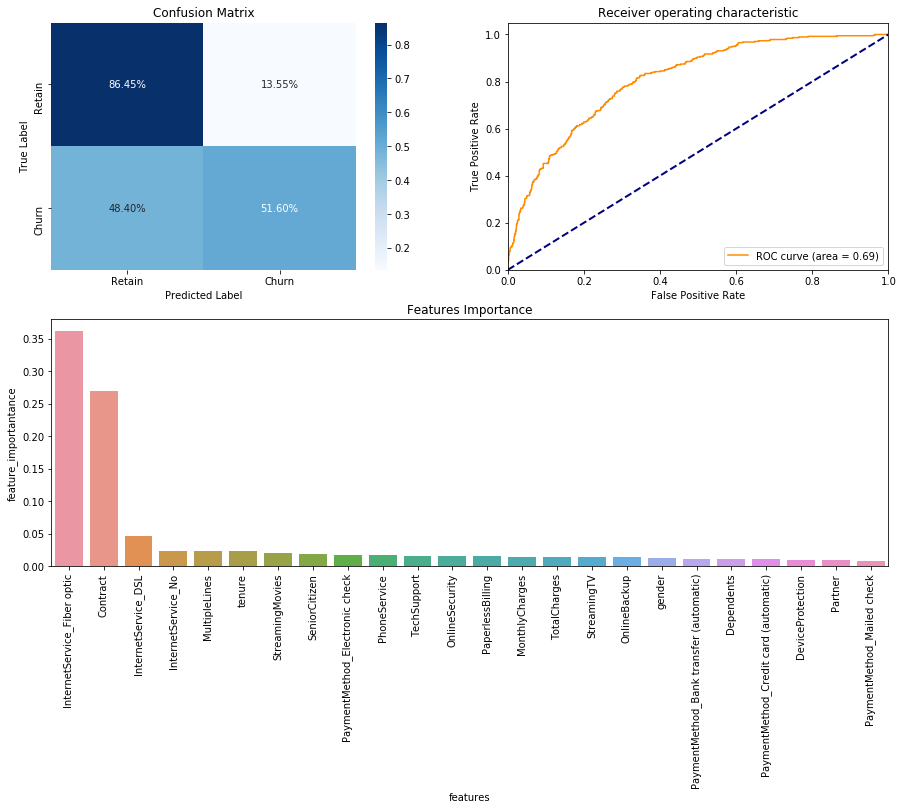

<Figure size 360x360 with 0 Axes>

In [88]:
xg = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=.3,objective='binary:logistic')
classifier_model_reports(xg,X_train,y_train,X_test,y_test)


### Hyperparameter Tuning XGBoost

In [89]:
# #Do Not Run this code on your local cpu. Takes a while
# param_test ={'eta': [.001, .01, .05, .1, .3], 
#              'max_depth': np.arange(6,11), 
#              'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 
#              'alpha': [0, 1e-1, 1, 5, 10], # L1 regularization
#              'lambda': [0, 1e-1, 1, 5, 10] # L2 regularization
#             }

# xg = xgb.XGBClassifier()
# grid_search = GridSearchCV(xg, param_test, scoring="f1", n_jobs=-1, cv=3)
# grid_result = grid_search.fit(X,y)
# joblib.dump(grid_result, 'xgb_grid.pkl') # Save the best_result

In [90]:
grid_result = joblib.load('xgb_grid.pkl')
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.599452 using {'alpha': 0, 'eta': 0.1, 'lambda': 1, 'max_depth': 6, 'min_child_weight': 100.0}


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=6,
              min_child_weight=100.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80

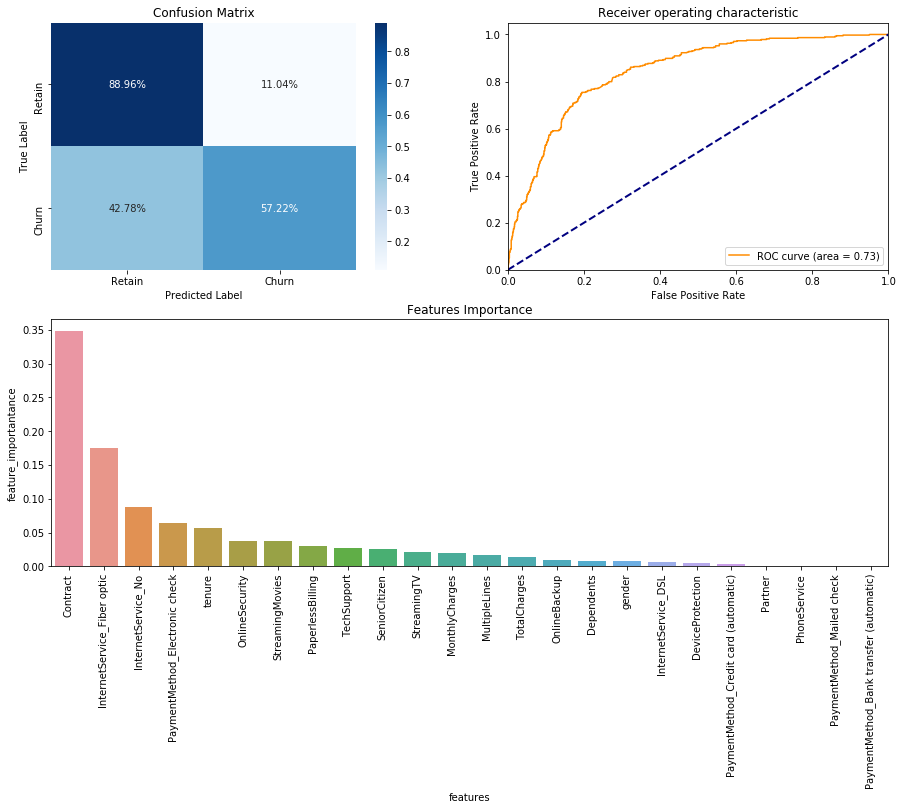

<Figure size 360x360 with 0 Axes>

In [91]:
opti_xg = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=.1, objective='binary:logistic', min_child_weight=100.0)
classifier_model_reports(opti_xg,X_train,y_train,X_test,y_test)

### LightGBM (Ensembling)

    LightGBM is leaf-wise tree growth algorithm using high performance of gradient boosting based on decision tree algorithm. Leaf-wise algorithm can reduce more loss compared to the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_bin=200,
               max_depth=10, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=72,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy Score: 0.792
F1 Score: 0.578
5 Splits Cross Validation average acc: 0.795




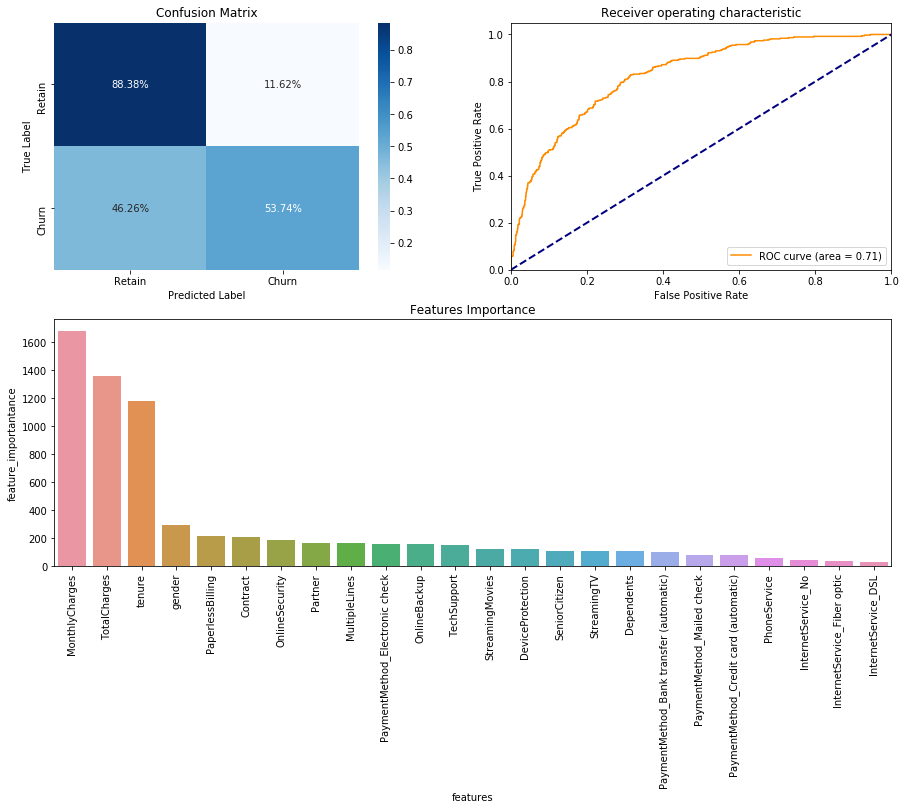

<Figure size 360x360 with 0 Axes>

In [92]:
lgb_classifier = lgb.LGBMClassifier(num_leaves=72, objective='binary', max_depth=10, learning_rate=.05, max_bin=200)
classifier_model_reports(lgb_classifier,X_train,y_train,X_test,y_test)

### Hyperparameter Tuning LightGBM

In [11]:
# param_test ={'num_leaves': np.random.randint(6, 80,5), 
#              'min_data_in_leaf': np.arange(100, 501,100), 
#              'min_sum_hessian_in_leaf': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=.2,scale=.8),
#              'colsample_bytree': sp_uniform(loc=.4,scale=.6),
#              'alpha': [0, 1e-1, 1, 2, 5],
#              'lambda': [0, 1e-1, 1, 5]}

# lgb = lgb.LGBMClassifier(max_depth=-1,metric='None', n_jobs=4, n_estimators=1000)
# gs = RandomizedSearchCV(
#     estimator=lgb, param_distributions=param_test, 
#     n_iter=100,
#     scoring='f1',
#     cv=3)
# lgb_grid_result = gs.fit(X,y)
# joblib.dump(lgb_grid_result, 'lgb_grid.pkl') # Save the best_result

In [12]:
lgb_grid_result = joblib.load('lgb_grid.pkl')
print("Best: %f using %s" % (lgb_grid_result.best_score_, lgb_grid_result.best_params_))

Best: 0.590916 using {'alpha': 1, 'colsample_bytree': 0.479074605294588, 'lambda': 0, 'min_child_weight': 100.0, 'min_data_in_leaf': 100, 'num_leaves': 20, 'subsample': 0.4015859345982422}


LGBMClassifier(alpha=1, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.05, max_depth=6, min_child_data_in_leaf=100,
               min_child_samples=20, min_child_weight=100.0, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=20, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Accuracy Score: 0.802
F1 Score: 0.598
5 Splits Cross Validation average acc: 0.806




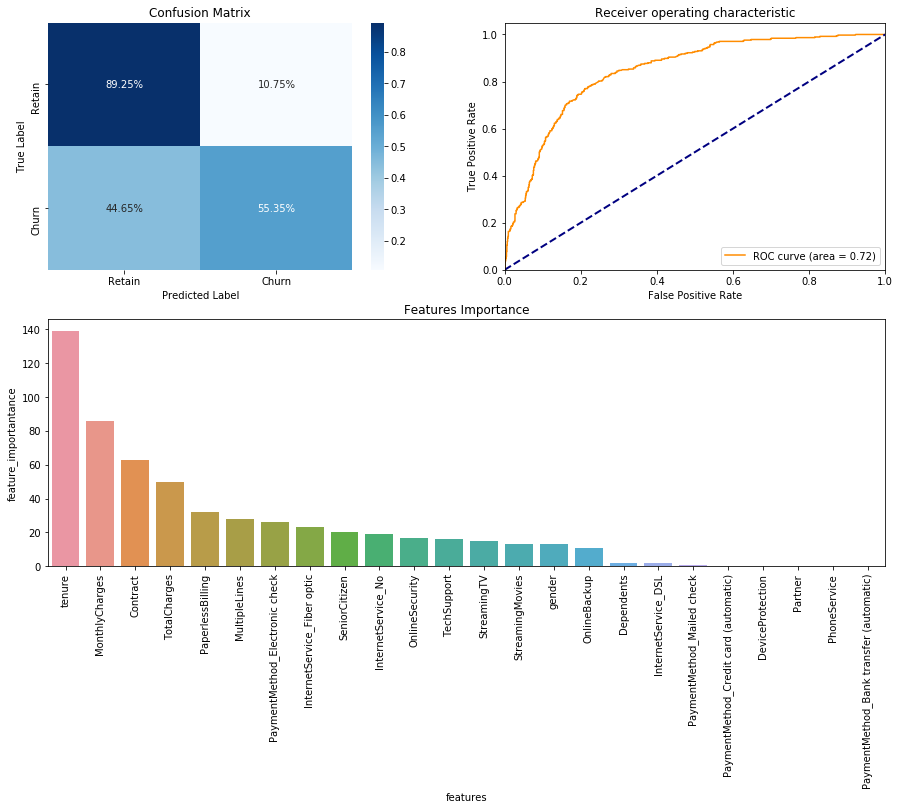

<Figure size 360x360 with 0 Axes>

In [95]:
opti_lgb = lgb.LGBMClassifier(num_leaves=20, max_depth=6, learning_rate=.05,alpha=1 ,objective='binary', min_child_weight=100.0, min_child_data_in_leaf = 100)
classifier_model_reports(opti_lgb,X_train,y_train,X_test,y_test)